In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
from matplotlib import pyplot as plt 

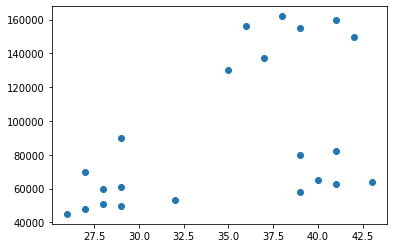

In [4]:
plt.scatter(df['Age'],df['Income($)'])

Here we see kind of three cluster. So for this partiular case choosing k is pretty straightforward. 

In [5]:
from sklearn.cluster import KMeans 

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['Age','Income($)']]) #we ignore name column because it categorical 

In [8]:
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

because we told algorithm to identify three cluster and it did (0,1,2)

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No handles with labels found to put in legend.


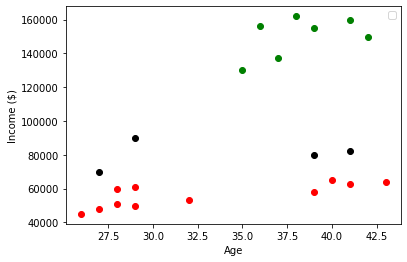

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'] ,df1['Income($)'],color='green')
plt.scatter(df2['Age'] ,df2['Income($)'],color='red')
plt.scatter(df3['Age'] ,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Here 'Black' clusters are not grouped correctly. This problem happened because our scaling is not right. Our 'x-axis' range is pretty narrow. So when we don't scale our features properly, we might get into this problem that's why we need to do some preprocessing and use min-max scaler to scale this 2 features and then only we can run our algorithm. 

In [11]:
import numpy as np
a1D = np.array(df['Income($)'])
a2D = a1D.reshape(-1,1)
a2D

array([[ 70000],
       [ 90000],
       [ 61000],
       [ 60000],
       [150000],
       [155000],
       [160000],
       [162000],
       [156000],
       [130000],
       [137000],
       [ 45000],
       [ 48000],
       [ 51000],
       [ 49500],
       [ 53000],
       [ 65000],
       [ 63000],
       [ 64000],
       [ 80000],
       [ 82000],
       [ 58000]], dtype=int64)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(a2D)
df['Income($)']=scaler.transform(a2D)
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


Now the 'Income($)' column is a range of 1 to 0

In [13]:
b1D = np.array(df['Age'])
b2D = b1D.reshape(-1,1)
b2D

array([[27],
       [29],
       [29],
       [28],
       [42],
       [39],
       [41],
       [38],
       [36],
       [35],
       [37],
       [26],
       [27],
       [28],
       [29],
       [32],
       [40],
       [41],
       [43],
       [39],
       [41],
       [39]], dtype=int64)

In [14]:
scaler.fit(b2D)
df.Age=scaler.transform(b2D)
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [16]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


No handles with labels found to put in legend.


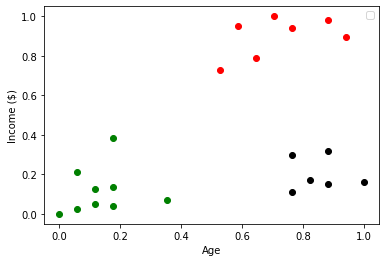

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'] ,df1['Income($)'],color='green')
plt.scatter(df2['Age'] ,df2['Income($)'],color='red')
plt.scatter(df3['Age'] ,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [18]:
#This is basically our centroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

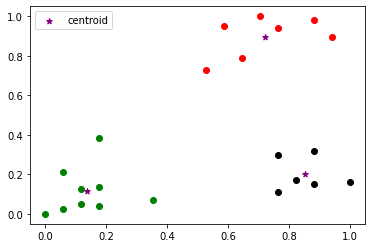

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [20]:
k_rng = range(1,10)
sse = []   #Sum squre error
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # 'km.inertia' gives us sum of squre error

In [21]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.2247696122877267,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

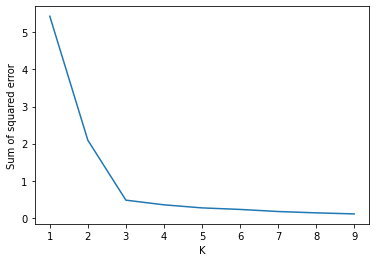

In [22]:
#Elbow Plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## DBSCAN 
Density Based Spatial Clustering of Applications with Noise. Density is number of points which are located in a given area  

Two important parameters are required for DBSCAN: epsilon (“eps”) and minimum points (“MinPts”). <br>EPS: The parameter eps defines the radius of neighborhood around a point x. It’s called called the ϵ
-neighborhood of x.<br>MinPts: The parameter MinPts is the minimum number of neighbors within “eps” radius.<br>Core Point: Any point x in the data set, with a neighbor count greater than or equal to MinPts, is marked as a core point.
<br>Boundary Point: If a point is a neighbor of a core point then it is called a Boundary point.<br>
Noise Point: If a point is neither a core pointe nor a boundary point, then that is called Noise Point.<br>Direct density reachable: A point is called direct density reachable if it has a core point in its neighbourhood. 


Resource: https://www.youtube.com/watch?v=ZkyQ4rNIFvE , https://www.youtube.com/watch?v=RDZUdRSDOok